AMAZON SALES REPORT: This dataset contains all the order details of the year 2022. This includes the fulfilment status, category of product, size, amount of the product, shipment city and all the shipping details.

DESCRIPTION: This dataset is taken from kaggle. This dataset consists of 128976 rows and 18 columns which we have altered further in the code. This contains different plots of visualizations for better understanding of the sales report such as data visualization, quantity per category, sales amount distribution and some more. This contains four machine learning models. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [9]:
# Load dataset and printing the dataset
df = pd.read_csv(r"C:\Users\NILANSHU\Desktop\Python\Amazon Sales Report major project\Amazon Sale Report.csv\Amazon Sale Report.csv")
df 

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [13]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [57]:
#This cell is giving us the number of rows and columns present in the dataset.
df.shape

(128976, 18)

In [17]:
# Data Preprocessing
## Drop unnecessary columns
df = df.drop(columns=['index', 'New', 'PendingS'])

In [21]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [25]:
# Fill missing values
df['fulfilled-by'] = df['fulfilled-by'].fillna('Unknown')
df['currency'] = df['currency'].fillna('Unknown')
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

In [27]:
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Unknown
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,Unknown
128972,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,Unknown
128973,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,Unknown
128974,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,False,Unknown


Plots of Visualizations:

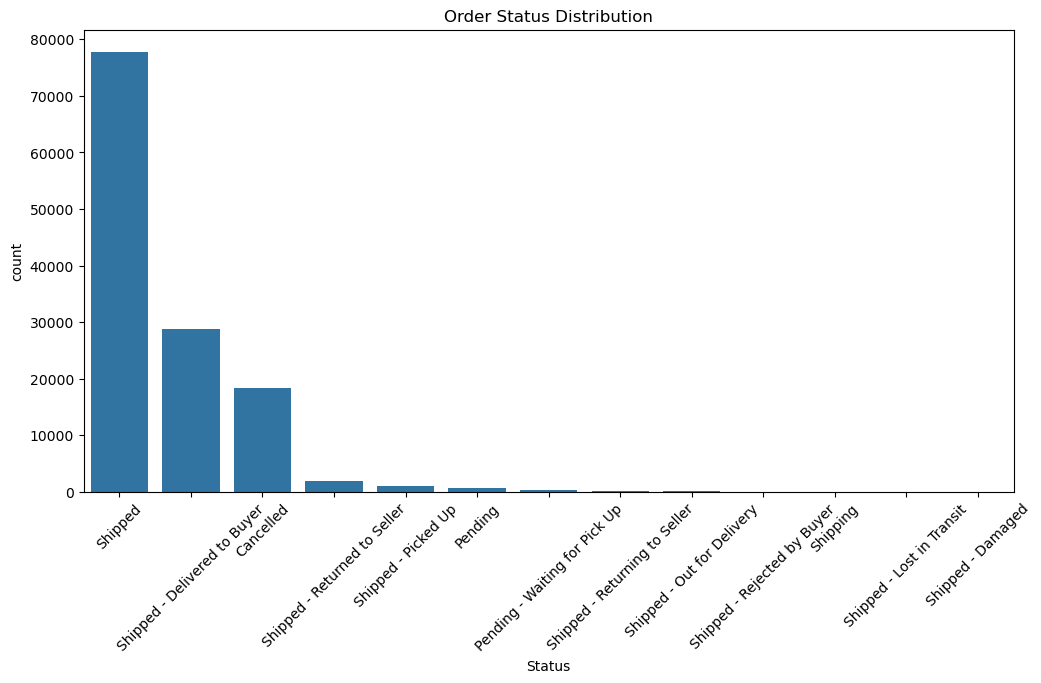

In [29]:
# Data Visualization
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index)
plt.title('Order Status Distribution')
plt.xticks(rotation=45)
plt.show()

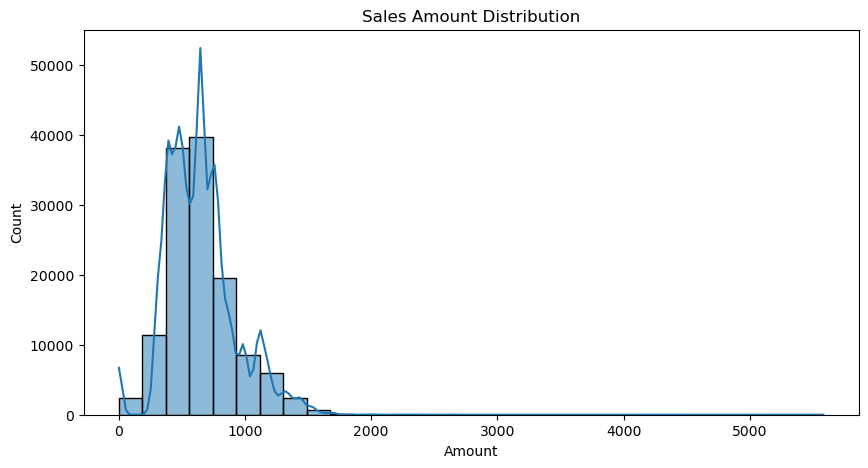

In [31]:
# Sales Amount Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Sales Amount Distribution')
plt.show()

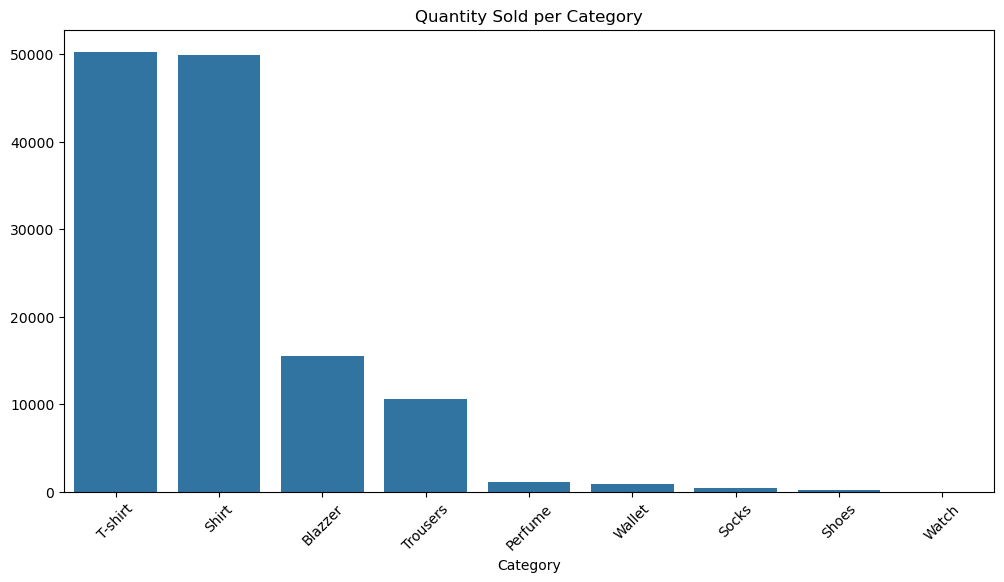

In [33]:
# Quantity Sold per Category
plt.figure(figsize=(12,6))
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts().values)
plt.title('Quantity Sold per Category')
plt.xticks(rotation=45)
plt.show()

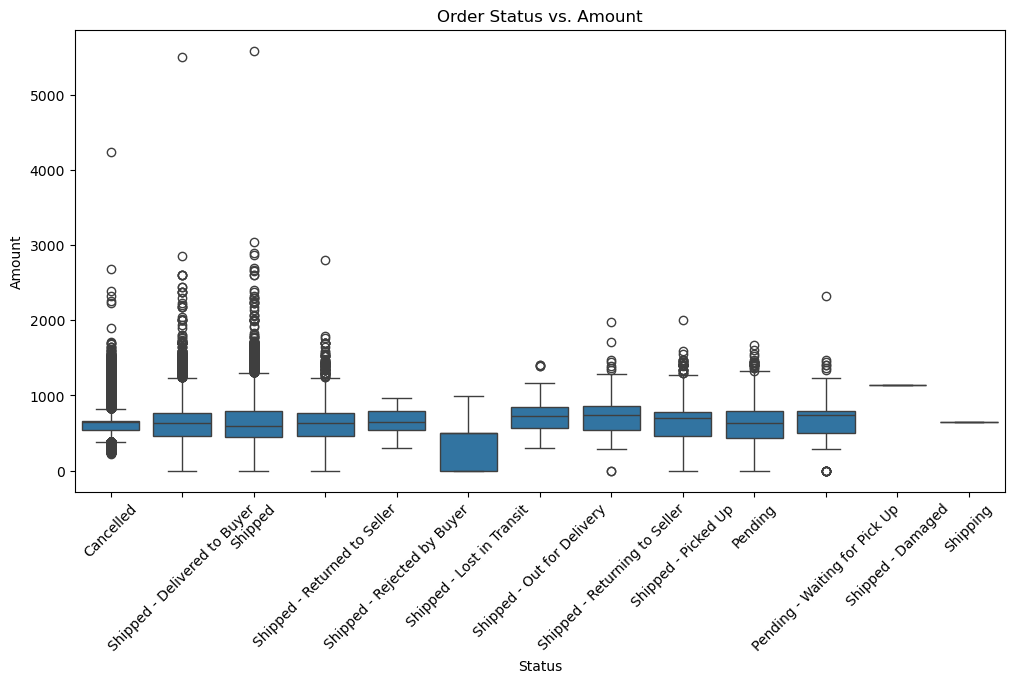

In [35]:
# Order Status vs. Amount
plt.figure(figsize=(12,6))
sns.boxplot(x='Status', y='Amount', data=df)
plt.title('Order Status vs. Amount')
plt.xticks(rotation=45)
plt.show()

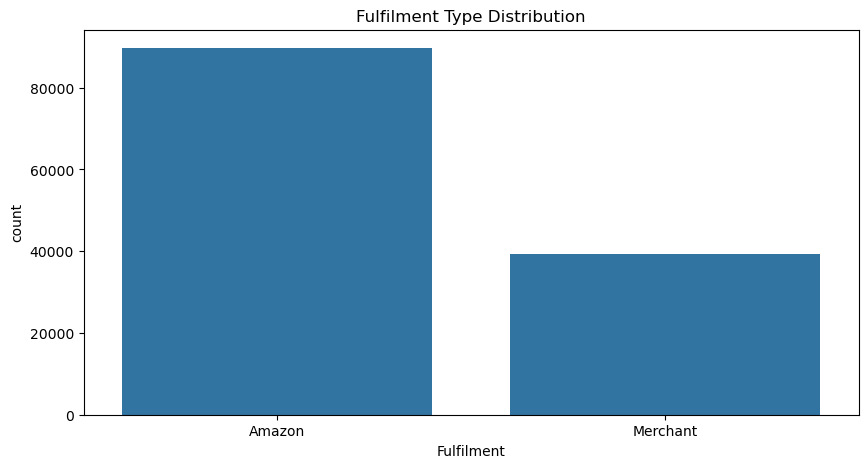

In [37]:
# Fulfilment Type Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Fulfilment', order=df['Fulfilment'].value_counts().index)
plt.title('Fulfilment Type Distribution')
plt.show()

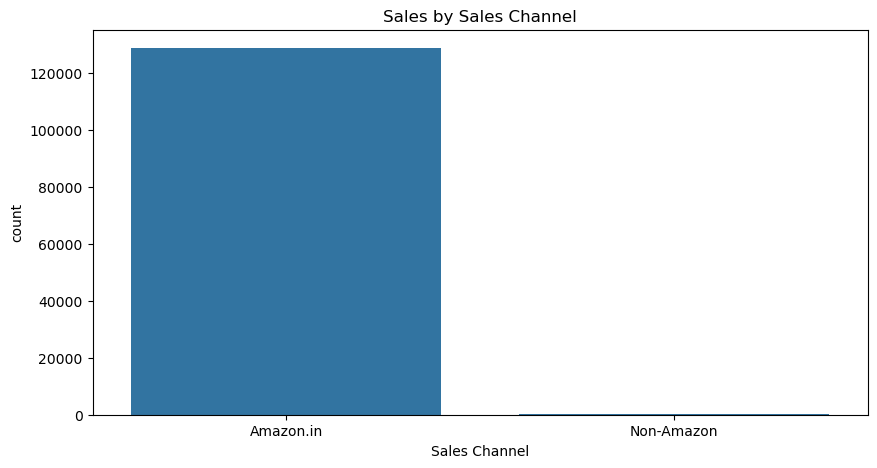

In [39]:
# Sales by Sales Channel
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Sales Channel', order=df['Sales Channel'].value_counts().index)
plt.title('Sales by Sales Channel')
plt.show()

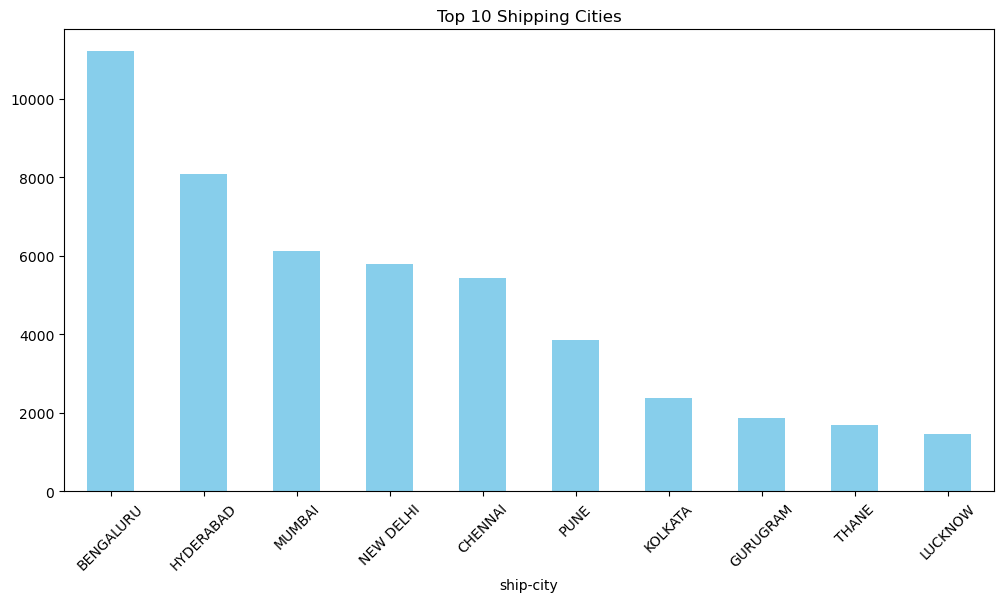

In [41]:
# Top 10 Shipping Cities
plt.figure(figsize=(12,6))
df['ship-city'].value_counts().nlargest(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Shipping Cities')
plt.xticks(rotation=45)
plt.show()

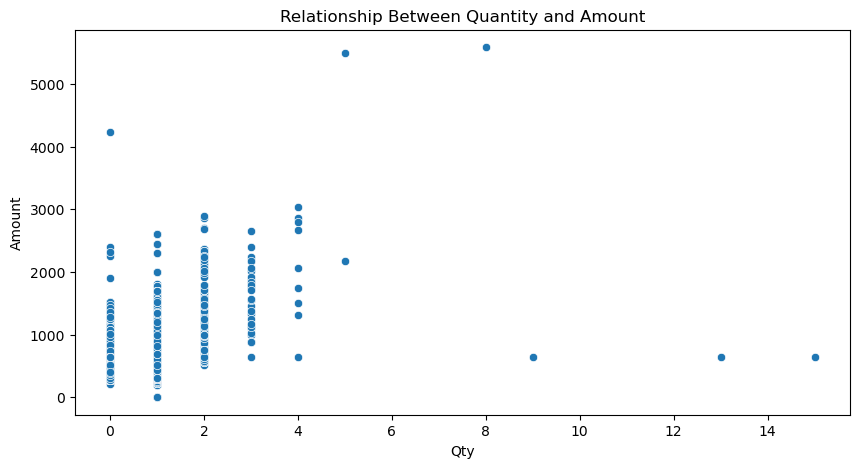

In [43]:
# Relationship Between Quantity and Amount
plt.figure(figsize=(10,5))
sns.scatterplot(x='Qty', y='Amount', data=df)
plt.title('Relationship Between Quantity and Amount')
plt.show()

Machine Learning Models:

In [45]:
# Encoding categorical variables
label_encoders = {}
for col in ['Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'currency', 'ship-country', 'fulfilled-by']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [47]:
# Defining Features and Target
X = df[['Qty', 'Amount', 'Status', 'Fulfilment', 'Sales Channel', 'Category']]
y = df['B2B'].astype(int)

In [49]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Standardizing numerical features
scaler = StandardScaler()
X_train[['Qty', 'Amount']] = scaler.fit_transform(X_train[['Qty', 'Amount']])
X_test[['Qty', 'Amount']] = scaler.transform(X_test[['Qty', 'Amount']])

In [53]:
# Model Training
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9936
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25630
           1       0.00      0.00      0.00       166

    accuracy                           0.99     25796
   macro avg       0.50      0.50      0.50     25796
weighted avg       0.99      0.99      0.99     25796



C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.9935
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25630
           1       0.00      0.00      0.00       166

    accuracy                           0.99     25796
   macro avg       0.50      0.50      0.50     25796
weighted avg       0.99      0.99      0.99     25796

SVM Accuracy: 0.9936
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25630
           1       0.00      0.00      0.00       166

    accuracy                           0.99     25796
   macro avg       0.50      0.50      0.50     25796
weighted avg       0.99      0.99      0.99     25796



C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NILANSHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Accuracy: 0.9935
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25630
           1       0.00      0.00      0.00       166

    accuracy                           0.99     25796
   macro avg       0.50      0.50      0.50     25796
weighted avg       0.99      0.99      0.99     25796

